# Introduction

In the paper to be submitted to the Monthly, we explore the convergence of various discrete-brachistochrone parameters to the corresponding parameters for the cycloid.  The purpose of this worksheet is to provide graphical illustrations for this convergence.

In [1]:
#!pip install pandas #uncomment the first time, if needed
#import sys
#!{sys.executable} -m pip install numpy

In [30]:
import pandas as pd
import numpy as np

## Defining the cycloid parameters and functions

In [3]:
var('x')
b=10 # right endpoint x-coordinate
a=-2 # right endpoint y-coordinate
F = (1-cos(2*x))/(2*x-sin(2*x))+a/b 
omega=find_root(F(x),.0001,6.28) #highest value of inclination parameter
R=b/(2*omega-sin(2*omega))
cyc_plot=parametric_plot((R*(2*x-sin(2*x)),R*(cos(2*x)-1)),(0,omega),ymin=-4,legend_label='cycloid')
print('Max angle on cycloid, in radians: '+str(round(omega,5)))
print('Wheel radius on cycloid: '+str(round(R,5)))

Max angle on cycloid, in radians: 2.29729
Wheel radius on cycloid: 1.78966


/opt/sagemath-9.0/local/lib/python3.7/site-packages/scipy/linalg/__init__.py:212: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/opt/sagemath-9.0/local/lib/python3.7/site-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import (exp, inf, pi, sqrt, floor, sin, cos, around, int,


In [4]:
T=2*sqrt(R/9.8)*omega
T #slide time of cycloid

1.96344405331340

## Defining the discrete-cycloid functions

We implement the algorithm from the paper.

In [5]:
var('N theta')
FN = (1-cos(2*x))/(2*N*sin(x/N)-sin(2*x))+a/b #This is the function whose root is the parameter omega_N

In [6]:
def dc_omegaN(num_segments): 
    thisFN=FN(num_segments,x)
    return find_root(thisFN,.0001,3.141)

def dc_RN(num_segments): 
    ome = dc_omegaN(num_segments)
    return b/(2*num_segments*sin(ome/num_segments)-sin(2*ome))

def dc_TN(N):
    return 4*N*sqrt(dc_RN(N)/9.8)*sin(dc_omegaN(N)/(2*N))

In [7]:
def XN(N):
    ome = dc_omegaN(N)
    return dc_RN(N)*(2*x*N/ome*sin(ome/N)-sin(2*x))

def YN(N):
    return dc_RN(N)*(cos(2*x)-1)

In [8]:
def dc_xList(N): #list of x-coordinates of vertices for given N
    ome = dc_omegaN(N)
    thisX = XN(N)
    return [thisX(k*ome/N) for k in range(N+1)]

def dc_yList(N): #ditto y-coordinates
    ome = dc_omegaN(N)
    thisY = YN(N)
    return [thisY(k*ome/N) for k in range(N+1)]


## Graphics of approach I: $N$-Brachistochrones and Cycloid
The piecewise linear paths approach the cycloid.

In [9]:
def dc_line(num_segments,leglabel,mycolor='red'):
    xydots=list(zip(dc_xList(num_segments),dc_yList(num_segments)))
    return line(xydots,legend_label=leglabel,color=mycolor)

def dc_dots(num_segments,mycolor='red',mysize=25):
    xydots=list(zip(dc_xList(num_segments),dc_yList(num_segments)))
    return points(xydots, color=mycolor,size=mysize,ymin=-6)

def dc_plot(num_segments,mycolor='red',mysize=25):
    return dc_line(num_segments,'N='+str(num_segments),mycolor)+dc_dots(num_segments,mycolor,mysize)

/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:2: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  from sage.repl.ipython_kernel.kernel import SageKernel
/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:6: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:4: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can us

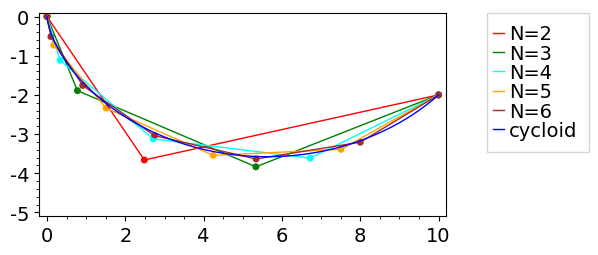

In [10]:
dp2=dc_plot(2)
dp3=dc_plot(3,'green')
dp4=dc_plot(4,'cyan')
dp5=dc_plot(5,'orange')
dp6=dc_plot(6,'brown')
cyc_plot_titled=parametric_plot((R*(2*x-sin(2*x)),
                                 R*(cos(2*x)-1)),(0,omega),ymin=-5,legend_label='cycloid', 
                                #title = 'Discrete brachistochrones approaching the cycloid',
                                fontsize=14)
cart_grph=dp2+dp3+dp4+dp5+dp6+cyc_plot_titled #ugly hack...want to title the multi-graph directly...
labels = cart_grph._extra_kwds.get('axes_labels')
if labels and labels[0]:
    displace = -.7 - .005 * cart_grph.fontsize()
else:
    displace = -.7

cart_grph.set_legend_options(
    bbox_to_anchor=(1.1, 0.5, .25, .5), 
    loc='upper right', 
    shadow=False,
    #mode="expand", 
    borderaxespad=0., font_size=14)
cart_grph.show(frame=True, axes=False)

#plt=cyc_plot+++disc_cyc_plot(4,'cyan')++disc_cyc_plot(6,'brown')

In [11]:
#cart_grph.save('v2_Cartesian.eps')

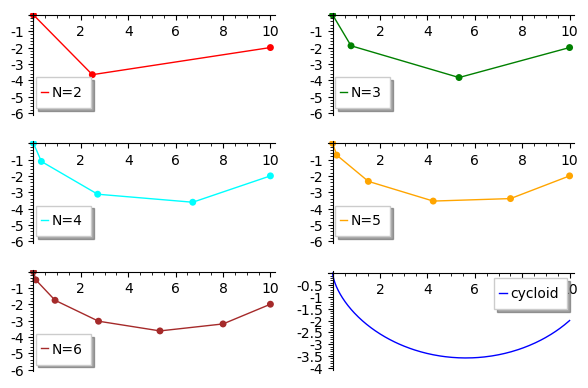

In [12]:
#cyc_plot_warped=parametric_plot((r_cycloid*(2*x-sin(2*x)),r_cycloid*(cos(2*x)-1)),(0,theta_max),ymin=-3.5,legend_label='cycloid')
# Again, ugly hack -- would like the line/dots to have ymin=-6 but don't know how
graphics_array([(dp2,dp3),(dp4,dp5),(dp6,cyc_plot)])

## Graphics of Approach II: Parametric Functions
The functions $X_N(\alpha)$ and $Y_N(\alpha)$ approach the functions $x(\alpha), y(\alpha)$ that parametrize the cycloid.

/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:2: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  from sage.repl.ipython_kernel.kernel import SageKernel
/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:6: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


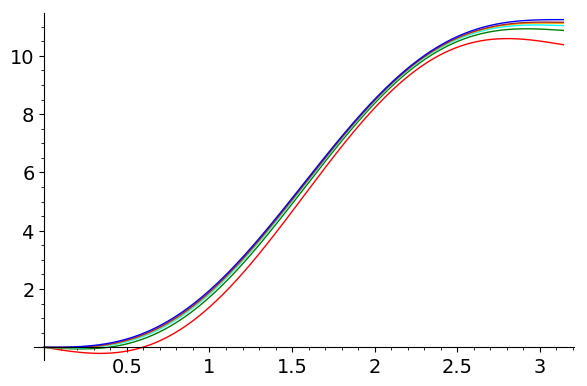

In [13]:
XX = R*(2*x-sin(2*x)) 
left = 0
right = pi
dX2=plot(XN(2), left, right, color='red') #, legend_label = 'N=2')
dX3=plot(XN(3), left, right, color='green') #, legend_label = 'N=3')
dX4=plot(XN(4), left, right, color='cyan') #, legend_label = 'N=4')
dX5=plot(XN(5), left, right, color='orange') #, legend_label = 'N=5')
dX6=plot(XN(6), left, right, color='brown') #, legend_label = 'N=6')
X_grph = dX2+dX3+dX4+dX5+dX6+plot(XX,left,right,
                                  #legend_label = 'Cycloid', 
                                  #title = '$X_N(\\alpha)$ and $X(\\alpha)$ versus $\\alpha$',
                                  fontsize=14)
X_grph

In [14]:
#X_grph.save('v2_X_grph.eps')

/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:2: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  from sage.repl.ipython_kernel.kernel import SageKernel
/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:6: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


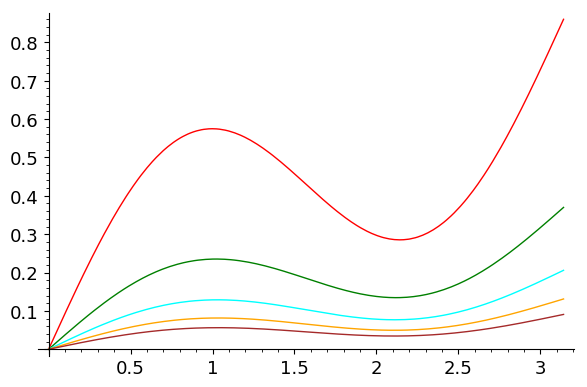

In [15]:
diff2 = plot(XX-XN(2),left, right,color='red', 
             #legend_label = 'N=2',
             #title='$X(\\alpha)-X_N(\\alpha)$ versus $\\alpha$ for $N=2,...,6$',
            fontsize=13)
diff3 = plot(XX-XN(3),left, right,color='green') #, legend_label = 'N=3')
diff4 = plot(XX-XN(4),left, right,color='cyan') #, legend_label = 'N=4')
diff5 = plot(XX-XN(5),left, right,color='orange') #, legend_label = 'N=5')
diff6 = plot(XX-XN(6),left, right,color='brown') #, legend_label = 'N=6')
Xd_grph=diff2+diff3+diff4+diff5+diff6
Xd_grph

In [16]:
#Xd_grph.save('v2_Xd_grph.eps')

/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:6: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


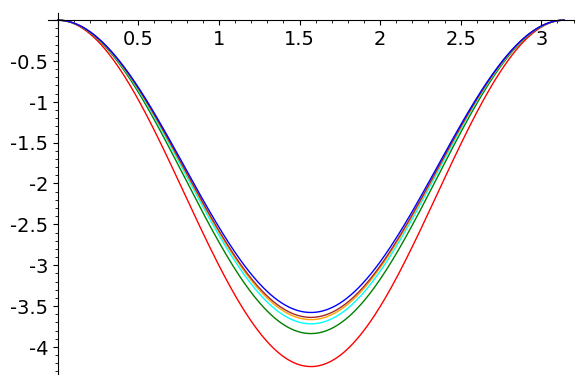

In [17]:
YY = R*(cos(2*x)-1) 
left = 0
right = pi
dY2=plot(YN(2), left, right, color='red') #, legend_label = 'N=2')
dY3=plot(YN(3), left, right, color='green') #, legend_label = 'N=3')
dY4=plot(YN(4), left, right, color='cyan') #, legend_label = 'N=4')
dY5=plot(YN(5), left, right, color='orange') #, legend_label = 'N=5')
dY6=plot(YN(6), left, right, color='brown') #, legend_label = 'N=6')
Y_grph = dY2+dY3+dY4+dY5+dY6+plot(YY,left,right,
                                  #legend_label = 'Cycloid', 
                                  #title = '$Y_N(\\alpha)$ and $Y(\\alpha)$ versus $\\alpha$'
                                  fontsize=14)
Y_grph

In [18]:
#Y_grph.save('v2_Y_grph.eps')

/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:6: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


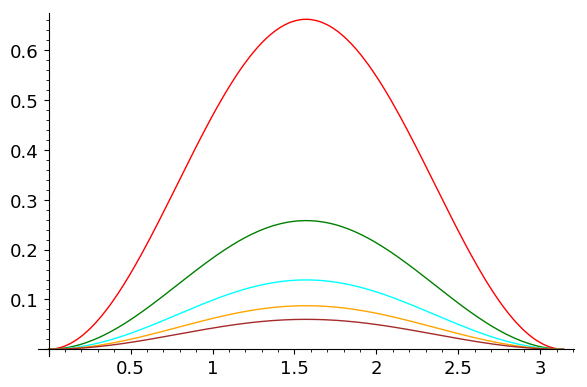

In [19]:
diffY2 = plot(YY-YN(2),left, right,color='red', 
              #legend_label = 'N=2',
             #title='$Y(\\alpha)-Y_N(\\alpha)$ versus $\\alpha$ for $N=2,...,6$',
            fontsize=13)
diffY3 = plot(YY-YN(3),left, right,color='green') #, legend_label = 'N=3')
diffY4 = plot(YY-YN(4),left, right,color='cyan') #, legend_label = 'N=4')
diffY5 = plot(YY-YN(5),left, right,color='orange') #, legend_label = 'N=5')
diffY6 = plot(YY-YN(6),left, right,color='brown') #, legend_label = 'N=6')
Yd_grph = diffY2+diffY3+diffY4+diffY5+diffY6
Yd_grph

In [20]:
#Yd_grph.save('v2_Yd_grph.eps')

## Graphics of Approach III: Sequences of Numerical Parameters
The numbers $R_N, \omega_N, T_N$ for the discrete brachistochrones approach $R, \omega, T$ for the cycloid.

/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:6: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:10: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


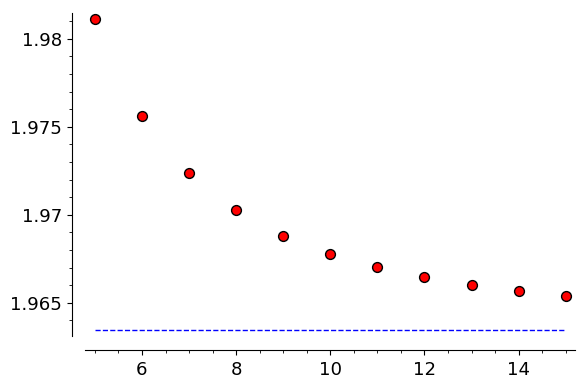

In [21]:
lowerN = 5
upperN = 15
Nvals=[*range(lowerN,upperN+1)] 
timevals = [dc_TN(N) for N in Nvals]
timevalplot=scatter_plot(list(zip(Nvals,timevals)),
                         #title = '$T_N$ versus $N$',
                         fontsize=13, facecolor='red')
T_grph=timevalplot+line([(lowerN,T),(upperN,T)],linestyle='dashed')
T_grph

In [22]:
#T_grph.save('v2_T_grph.eps')

/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:1: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  from ipykernel.kernelapp import IPKernelApp


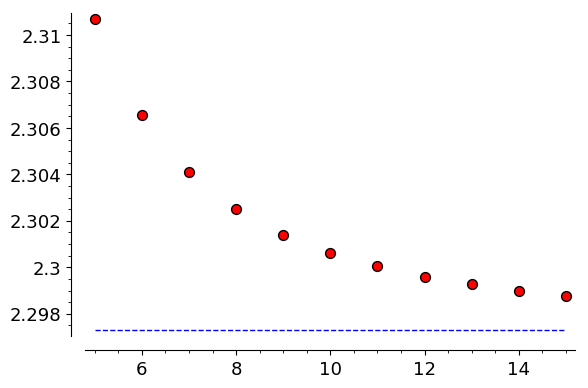

In [23]:
omegavals = [dc_omegaN(N) for N in Nvals]
omegavalplot=scatter_plot(list(zip(Nvals,omegavals)),facecolor = 'red', 
                          #title = '$\\omega_N$ versus $N$', 
                          fontsize=13)
omega_grph = omegavalplot+line([(lowerN,omega),(upperN,omega)],linestyle='dashed')           
omega_grph

In [24]:
#omega_grph.save('v2_omega_grph.eps')

/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:6: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


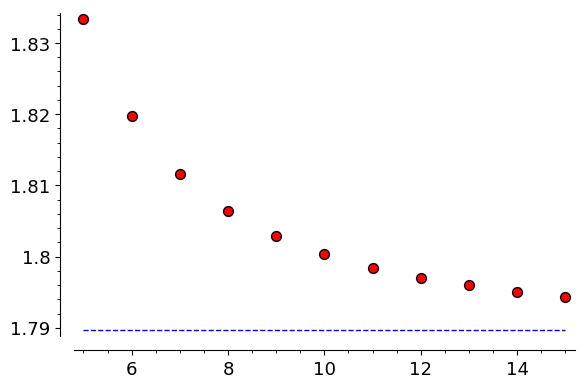

In [25]:
Rvals = [dc_RN(N) for N in Nvals]
Rvalplot=scatter_plot(list(zip(Nvals,Rvals)),facecolor = 'red', 
                      #title = '$R_N$ versus $N$', 
                      fontsize=13)
R_grph = Rvalplot+line([(lowerN,R),(upperN,R)],linestyle='dashed')  
R_grph

In [26]:
#R_grph.save('R_grph.eps')

   # Table of numerical values associated with an N-brachistochrone

In [113]:
N=20 #change this to whatever N you want to tabulate for

In [114]:
xc = dc_xList(N)
yc = dc_yList(N)
xi = xc[:-1]
xi[0]=0.0 #so it'll let me round it already!
xf = xc[1:]
yi = yc[:-1]
yi[0] = 0.0
yf = yc[1:]
data = pd.DataFrame({'Seg.': range(1,N+1), 'Init. X': xi, 'Fin. X': xf, 'In. Y': yi, 'Fin. Y': yf})
data['DeltaX'] = data['Fin. X'] - data['Init. X']
data['DeltaY'] = data['Fin. Y'] - data['In. Y']
data = data[['Seg.', 'Init. X', 'Fin. X', 'DeltaX', 'In. Y', 'Fin. Y', 'DeltaY']]
data['Length'] = np.sqrt(data['DeltaX']^2 + data['DeltaY']^2)
data['Theta'] = np.arccos(data['DeltaY']/data['Length'])
data.set_index('Seg.', inplace = True)
data['DeltaTh'] = data['Theta'].diff()
data['DelXRat'] = data['DeltaX'].div(data['DeltaX'].shift(1)) #ratio of DeltaX to the previous DeltaX
data['DelYRat'] = data['DeltaY'].div(data['DeltaY'].shift(1)) #ditto with DeltaY
#data.round(3) keeps throwing an error
for column in data:
    data[column] = data[column].map(lambda x: round(x,4)) #thx Ichabod...  https://python-forum.io/thread-13919.html
np.set_printoptions(250) 
print(data)

     Init. X  Fin. X  DeltaX    In. Y   Fin. Y   DeltaY  Length   Theta  \
Seg.                                                                      
1        0.0  0.0027  0.0027      0.0  -0.0471  -0.0471  0.0472  3.0841   
2     0.0027  0.0269  0.0242  -0.0471   -0.186  -0.1389   0.141  2.9692   
3     0.0269  0.0929   0.066   -0.186  -0.4094  -0.2233  0.2329  2.8543   
4     0.0929  0.2188  0.1259  -0.4094  -0.7054  -0.2961  0.3217  2.7394   
5     0.2188  0.4197  0.2009  -0.7054  -1.0586  -0.3532  0.4063  2.6245   
6     0.4197  0.7065  0.2869  -1.0586  -1.4504  -0.3918  0.4856  2.5096   
7     0.7065  1.0859  0.3794  -1.4504  -1.8602  -0.4098  0.5584  2.3947   
8     1.0859  1.5594  0.4735  -1.8602  -2.2664  -0.4062  0.6239  2.2798   
9     1.5594  2.1239  0.5644  -2.2664  -2.6477  -0.3813  0.6811  2.1649   
10    2.1239  2.7711  0.6472  -2.6477   -2.984  -0.3363  0.7294    2.05   
11    2.7711  3.4888  0.7176   -2.984  -3.2576  -0.2736   0.768  1.9351   
12    3.4888  4.2607  0.7

/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:2: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  from sage.repl.ipython_kernel.kernel import SageKernel
/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:6: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:4: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can us

In [110]:
data['DeltaX'].div(data['DeltaX'].shift(1))

Seg.
1                    NaN
2      8.799999999999999
3     2.6445454545454545
4     1.8181505672052254
5     1.4927207411608998
6     1.3107029765674476
7     1.1879590258987245
8      1.093955909867404
9     1.0146490184414039
10     0.942103334554782
11    0.8707117852975496
12    0.7951398195300635
Name: DeltaX, dtype: object